## Oscilador Armonico

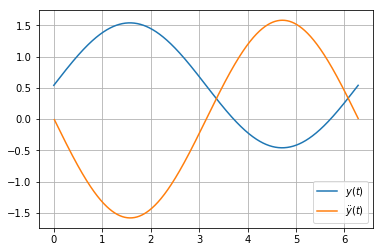

In [3]:
import numpy as np
import matplotlib.pyplot as plt

a,c = 1,1 #coeficientes constantes
A,B = 1,1 #Amplitudes constantes

phi_1, phi_2 = 0,0 #Constantes de desplazamiento de fase

t = np.linspace(0,2*np.pi,1000) #vector tiempo. Creo que  2pi/1000 es como un dx, ¿no?
y = A*np.sin(np.sqrt(c/a)*t+phi_1) + B*np.cos(np.sqrt(c/a) + phi_2) #y(t)
d2y_dt2 = np.diff(np.diff(y))/(0.005)**2 #Segunda derivada de y(t). ¿Se podria usar en lugar de 0.005 2pi/1000?

#Graficar
plt.grid(True)
plt.plot(t,y,label='$y(t)$')
plt.plot(t[2:],d2y_dt2,label='$\ddot{y}(t)$')
plt.legend()
plt.show()


## Oscilador Armonico Amortiguado

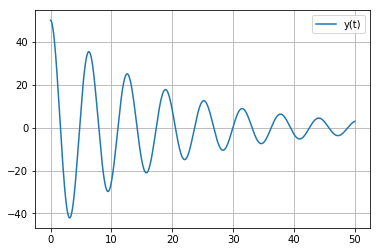

In [5]:
#Configurar Coeficientes
puntos = 5000
a = 100
b = 10
c = 100

y = np.zeros((puntos,1)) #y es un array con 5000 posiciones, todas llenas de ceros.

#condiciones iniciales y tiempo de muestreo (dt)
dt = 0.01
y[0] = 50 #y[0]
dydt = 0 #z[0]

#simulacion
for n in range (1,puntos):
    dydt = ((a/dt)*(dydt) - c*y[n-1]) / ((a/dt) + b + c*dt)
    y[n] = y[n-1] + dt*dydt
    
#Graficar
plt.grid(True)    
plt.plot(np.linspace(0,dt*puntos,puntos),y,label='y(t)')
plt.legend()
plt.show()

## Respuesta al impulso

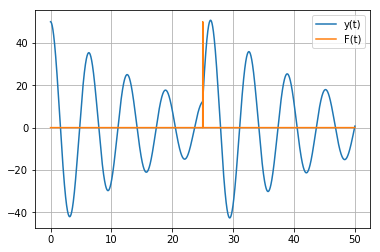

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Configurar Coeficientes
puntos = 5000
a = 100
b = 10
c = 100

y = np.zeros((puntos,1)) #y es un array con 5000 posiciones, todas llenas de ceros.

#condiciones iniciales y tiempo de muestreo (dt)
dt = 0.01
y[0] = 50 #y[0]
dydt = 0 #z[0]

#impulso
f = np.zeros((puntos,1))
f[2500] = 50

#simulacion
for n in range (1,puntos):
    dydt = f[n] + ((a/dt)*(dydt) - c*y[n-1]) / ((a/dt) + b + c*dt)
    y[n] = y[n-1] + dt*dydt
    
#Graficar
plt.grid(True)    
plt.plot(np.linspace(0,dt*puntos,puntos),y,label='y(t)')
plt.plot(np.linspace(0,dt*puntos,puntos),f,label='F(t)')
plt.legend()
plt.show()

## Respuesta al escalon

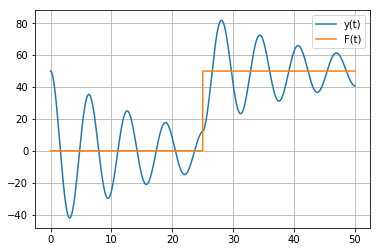

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Configurar Coeficientes
puntos = 5000
a = 100
b = 10
c = 100

y = np.zeros((puntos,1)) #y es un array con 5000 posiciones, todas llenas de ceros.

#condiciones iniciales y tiempo de muestreo (dt)
dt = 0.01
y[0] = 50 #y[0]
dydt = 0 #z[0]

#escalon
f = np.zeros((puntos,1))
for i in range (2500, puntos, 1):
    f[i] = 0.5

#simulacion
for n in range (1,puntos):
    dydt = f[n] + ((a/dt)*(dydt) - c*y[n-1]) / ((a/dt) + b + c*dt)
    y[n] = y[n-1] + dt*dydt
    
#Graficar
plt.grid(True)    
plt.plot(np.linspace(0,dt*puntos,puntos),y,label='y(t)')
plt.plot(np.linspace(0,dt*puntos,puntos),f*100,label='F(t)')
plt.legend()
plt.show()

## Circuito RLC con filtro pasabandas

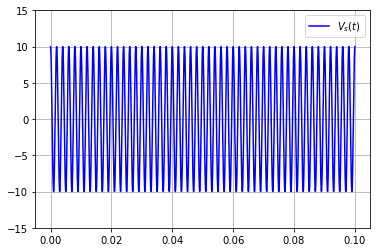

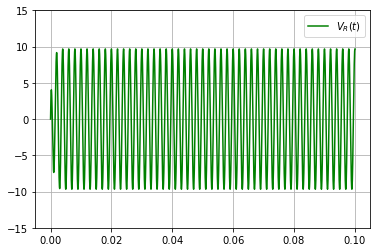

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#onfigurar coeficientes
puntos = 10000 #0.1 seconds with dt = 0.00001
L = 10e-3 #10 mH
R = 30   #30  ohm
C = 10e-6 #10 uF

#llenar vectores Q e I con zeros (10 000 posiciones)
Q = np.zeros((puntos,1))
I = np.zeros((puntos,1))


#condiciones iniciales y tiempos de muestreo
dt = 0.00001; # 10 us
Q[0] = 0;  #y[0]
I[0] = 0;  #z[0]

#fuente de voltaje
t = np.linspace(0,0.1,10000)
f = 500 #frecuencia natural 500Hz 
Vs = 10*np.cos(2*np.pi*f*t)


#Simulation
for n in range(1,puntos):
    I[n] = (Vs[n] + (L/dt)*(I[n-1]) - (1/C)*Q[n-1]) / ((L/dt) + R + (1/C)*dt)
    Q[n] = Q[n-1] + dt*I[n]

#Voltaje en el resistor
VR = R*I

#Graficar
plt.figure()
plt.grid(True)    
plt.ylim(-15,15)
plt.plot(np.linspace(0,dt*puntos,puntos),Vs,'b-',label='$V_s(t)$')
plt.legend()
plt.show()

plt.grid(True)    
plt.ylim(-15,15)
plt.plot(np.linspace(0,dt*puntos,puntos),VR,'g-',label='$V_R(t)$')
plt.legend()
plt.show()

## Suspension vehicular

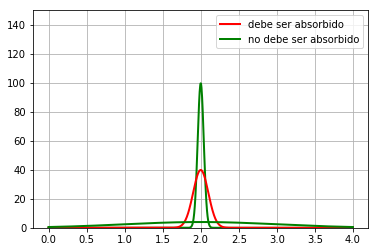

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sig):
    return (1/np.sqrt(2*np.pi*sig**2))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

t = np.linspace(0,4,1000);

plt.grid(True)
plt.ylim(0,150);
width = 0.04;
plt.plot(t,10*gaussian(t,2,width),'g-',linewidth=2);

width = 0.1;
plt.plot(t,10*gaussian(t,2,width),'r-',linewidth=2,label='debe ser absorbido');

width = 1;
plt.plot(t,10*gaussian(t,2,width),'g-',linewidth=2,label='no debe ser absorbido');

plt.legend()
plt.show()